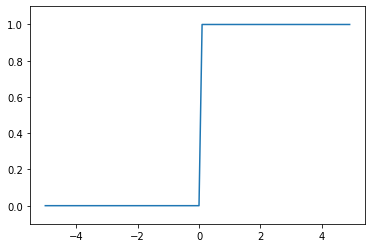

In [2]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
 
    return np.array(x>0,dtype=np.int)

x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

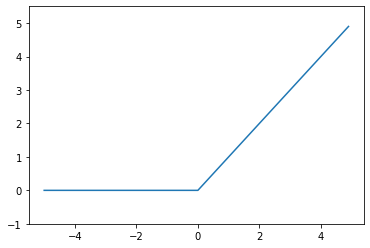

In [2]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x=np.arange(-5.0, 5.0, 0.1)
y=relu(x)
plt.plot(x,y)
plt.ylim(-1.0,5.5)
plt.show()

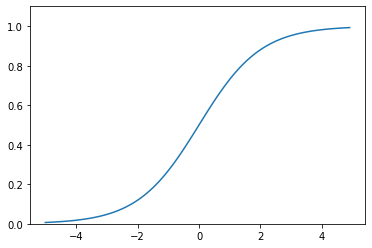

In [5]:
import numpy as np 
import matplotlib.pylab as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

X=np.arange(-5.0, 5.0, 0.1)
Y=sigmoid(x)
plt.plot(X,Y)
plt.ylim(0, 1.1)
plt.show()

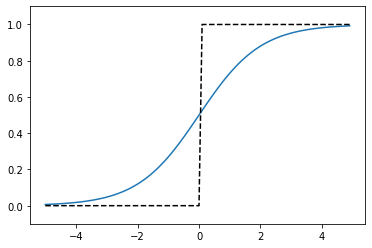

In [5]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def step_function(x):
    return np.array(x>0 , dtype=np.int)

x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x,y1)
plt.plot(x,y2,'k--')
plt.ylim(-0.1, 1.1)
plt.show()

In [1]:

import numpy as np


def get_data():
    (x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,flatten=True,one_hot_label=False)
    return x_test,t_test

def init_network():
    with open("sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    return(y)

    print(y)
    

In [6]:

import numpy as np


class TwoLayerNet:
    
    def __init__(self,input_size, hidden_size, output_size, weight_init_std=0.01):
        
        self.params = {}
        self.params['W1']=weight_init_std * np.ramdom.randn(input_size, hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2']=np.zeros(output_size)
        
        #계층생성
        self.layers = OrderedDict()
        self.layers['Affine1']= Affine(self.params['W1'],self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2']= Affine(self.params['W2'],self.params['b2'])
        
        self.lastLayer = SoftmaxWithLoss()
    
    def predict(self, x):
        for layers in self.layers.values():
            x=layer.forward(x)
        
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : 
            t=np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t)/ float(x.shape[0])
        
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W:self.loss(x,t)
        
        grads={}
        grads['W1']=numerical_gradient(loss_W, self.params['W1'])
        grads['b1']=numerical_gradient(loss_W, self.params['b1'])
        grads['W2']=numerical_gradient(loss_W, self.params['W2'])
        grads['b2']=numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x, t):
        self.loss(x,t)
        
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        grads = {}
        grads['W1'] = self,layers['Affine1'].dw
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self,layers['Affine2'].dw
        grads['b2'] = self.layers['Affine2'].db
        
        return grads  
    
    
    

# 3층 신경망 구현

In [2]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([1.0,0.2,0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X,W1)+B1
Z1 = sigmoid(A1)

(2,)
(2, 3)
(3,)


은닉층의 활성화 값 분포

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
        
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z


히스토그램 그리기

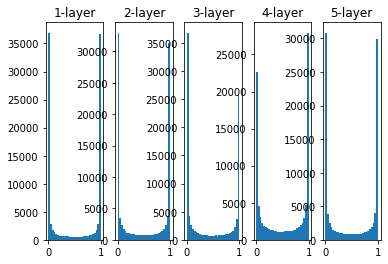

In [8]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

표준편차 0.01인 정규분포로 초기화

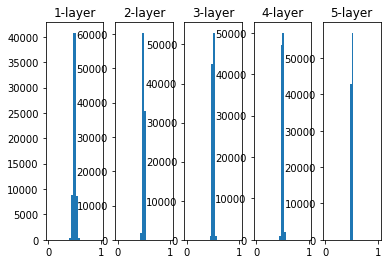

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01
        
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

표준편차로 정규화

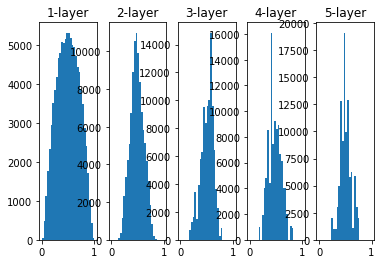

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num)/np.sqrt(node_num)
        
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

4강 신경망 학습 기울기

In [3]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zero
    